# Datasets

This notebook contains plots describing the overall properties of the different datasets
used.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from regn.data.gprof import GMIDataset

## Load the data

In [5]:
training_data_small = GMIDataset("../../data/training_data_gmi_small.nc")
training_data_large = GMIDataset("../../data/training_data_gmi_large.nc")
validation_data_small = GMIDataset("../../data/validation_data_gmi_small.nc")
test_data = GMIDataset("../../data/test_data_gmi.nc")

## Rain rate distribution

### Raining/Non raining fractions

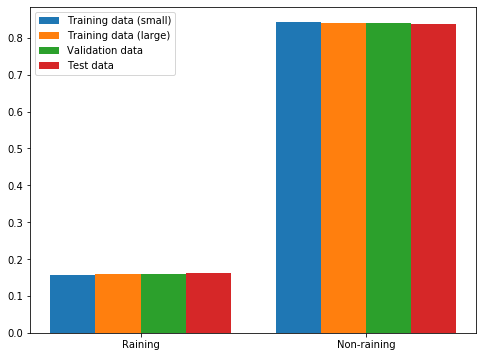

In [6]:
raining_train_small = np.mean(training_data_small.y > 0.0)
raining_train_large = np.mean(training_data_large.y > 0.0)
raining_validation = np.mean(validation_data_small.y > 0.0)
raining_test = np.mean(test_data.y > 0.0)
data = [raining_train_small,
        raining_train_large,
        raining_validation,
        raining_test]
labels = ["Training data (small)",
          "Training data (large)",
          "Validation data",
          "Test data"]

f, ax = plt.subplots(1, 1, figsize=(8, 6))
width = 0.2
for i, (d, l) in enumerate(zip(data, labels)):
    x = [0.0 + i * width, 1.0 + i * width]
    y = [d, 1.0 - d]
    ax.bar(x, y, width=0.2, label=l)
    
ax.set_xticks([0.3, 1.3]) 
ax.set_xticklabels(["Raining", "Non-raining"])
ax.legend()

### Rain rates

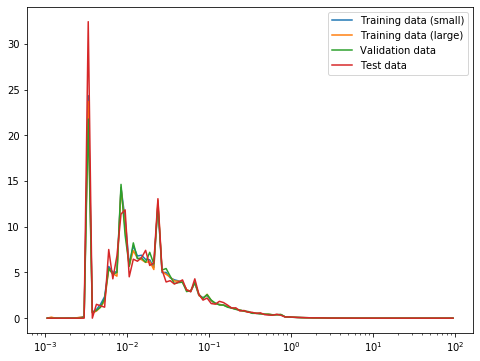

In [7]:
bins = np.logspace(-3, 2, 101)
rain_rates_train_small, _ = np.histogram(training_data_small.y, bins=bins, density=True)
rain_rates_train_large, _ = np.histogram(training_data_large.y, bins=bins, density=True)
rain_rates_validation, _ = np.histogram(validation_data_small.y, bins=bins, density=True)
rain_rates_test, _ = np.histogram(test_data.y, bins=bins, density=True)

data = [rain_rates_train_small,
        rain_rates_train_large,
        rain_rates_validation,
        rain_rates_test]
labels = ["Training data (small)",
          "Training data (large)",
          "Validation data",
          "Test data"]

x = 0.5 * (bins[1:] + bins[:-1])
f, ax = plt.subplots(1, 1, figsize=(8, 6))
for i, (d, l) in enumerate(zip(data, labels)):
    ax.plot(x, d, label=l)
    
ax.set_xscale("log")
ax.legend()

## Surface types

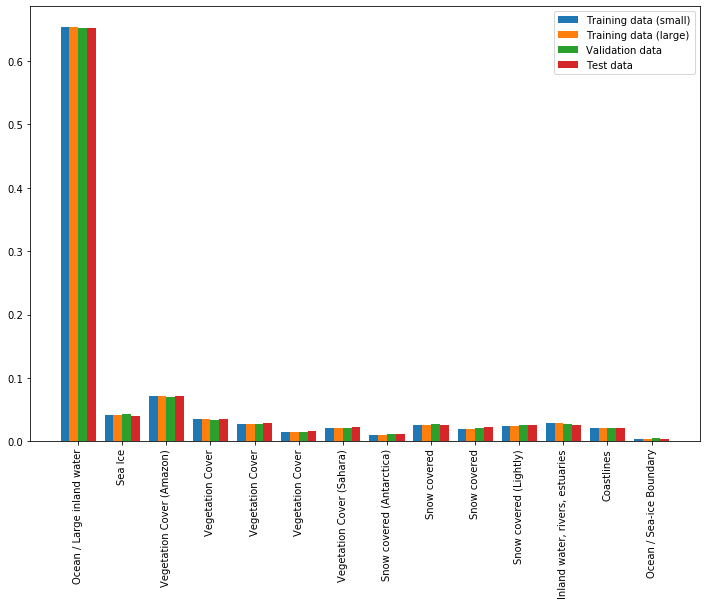

In [8]:
import pandas as pd
data = {"Training data (small)": training_data_small.file["surface_type"][:] - 1.0,
        "Training data (large)": training_data_small.file["surface_type"][:] - 1.0,
        "Validation data": validation_data_small.file["surface_type"][:] - 1.0,
        "Test data": test_data.file["surface_type"][:] - 1.0}
bins = np.arange(15) - 0.5
f, ax = plt.subplots(1, 1, figsize=(12, 8))

x = np.arange(14)
width = 0.2
for i, l in enumerate(data):
    bars, _ = np.histogram(data[l], bins=bins, density=True)
    ax.bar(x + i * width, bars, width, label=l)
    
ax.legend()
ax.set_xticks(x + 0.3)

vegetation_types = ["Ocean / Large inland water",
                    "Sea Ice",
                    "Vegetation Cover (Amazon)",
                    "Vegetation Cover",
                    "Vegetation Cover",
                    "Vegetation Cover",
                    "Vegetation Cover (Sahara)",
                    "Snow covered (Antarctica)",
                    "Snow covered",
                    "Snow covered",
                    "Snow covered (Lightly)",
                    "Inland water, rivers, estuaries",
                    "Coastlines",
                    "Ocean / Sea-ice Boundary"]
ax.set_xticklabels(vegetation_types, rotation=90);

## Brightness temperatures

In [9]:
training_data_small.file["brightness_temperature"]

<class 'netCDF4._netCDF4.Variable'>
float32 brightness_temperature(samples, channels)
unlimited dimensions: samples
current shape = (2427891, 13)
filling on, default _FillValue of 9.969209968386869e+36 used

0


/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  if sys.path[0] == '':
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  del sys.path[0]
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: VisibleDep

1


/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  if sys.path[0] == '':
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  del sys.path[0]
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: VisibleDep

2


/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  if sys.path[0] == '':
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  del sys.path[0]
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: VisibleDep

3


/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  if sys.path[0] == '':
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  del sys.path[0]
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: VisibleDep

4


/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  if sys.path[0] == '':
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  del sys.path[0]
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: VisibleDep

5


/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  if sys.path[0] == '':
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  del sys.path[0]
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: VisibleDep

6


/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  if sys.path[0] == '':
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  del sys.path[0]
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: VisibleDep

7


/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  if sys.path[0] == '':
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  del sys.path[0]
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: VisibleDep

8


/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  if sys.path[0] == '':
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  del sys.path[0]
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: VisibleDep

9


/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  if sys.path[0] == '':
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  del sys.path[0]
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: VisibleDep

10


/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  if sys.path[0] == '':
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  del sys.path[0]
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: VisibleDep

11


/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  if sys.path[0] == '':
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  del sys.path[0]
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: VisibleDep

12


/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  if sys.path[0] == '':
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  del sys.path[0]
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: VisibleDep

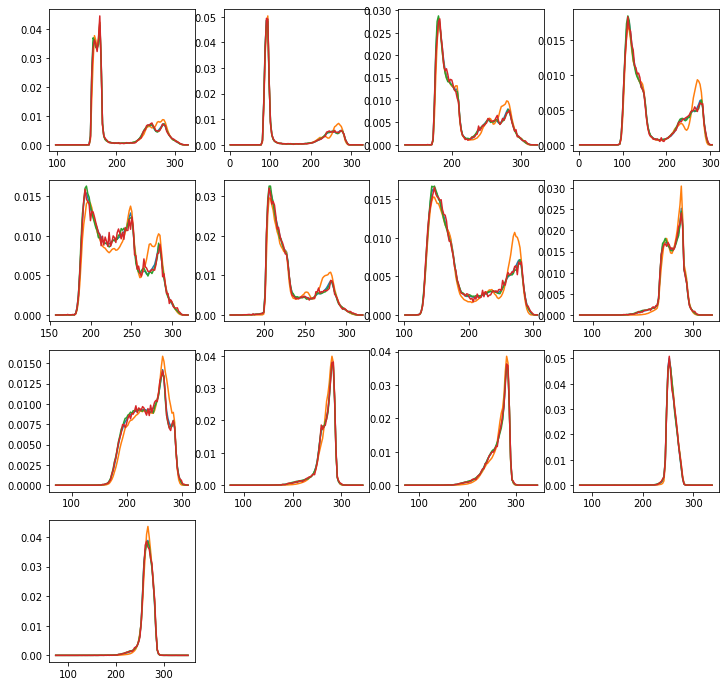

In [15]:
f, axs = plt.subplots(4, 4, figsize=(12, 12))

for i in range(16):
    ax = axs[i // 4, i % 4]
    if i < 13:
        print(i)
        bts_training_small = training_data_small.file["brightness_temperature"][:, i]
        bts_training_large = training_data_large.file["brightness_temperature"][:, i]
        bts_validation_small = validation_data_small.file["brightness_temperature"][:, i]
        bts_test = test_data.file["brightness_temperature"][:, i]
        
        y_training_small, bins = np.histogram(bts_training_small, bins=100, density=True)
        y_training_large, _ = np.histogram(bts_training_large, bins=bins, density=True)
        y_validation_small, _ = np.histogram(bts_validation_small, bins=bins, density=True)
        y_test, _ = np.histogram(bts_test, bins=bins, density=True)
        
        x = 0.5 * (bins[1:] + bins[:-1])
        ax.plot(x, y_training_small)
        ax.plot(x, y_training_large)
        ax.plot(x, y_validation_small)
        ax.plot(x, y_test)
    else:
        ax.set_visible(False)

In [14]:
np.histogram?

## training_data_small.file["tcwv"][:10]